# **Practice Assignemnt 2 - Multiple Linear Regression - Bike Sharing Dataset**

1. Load DS
2. Clean the DS - remove unwanted cols
3. Preprocessing - any conversions needed
4. Visualizations - here we are doing stats. analysis to find which factors contribute the most in cnt

5. Model Training
6. Errors - RMSE, MAE, R2, etc.
7. After training - testing plots for inference

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [3]:
df = pd.read_csv("day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
df.shape

(730, 16)

In [5]:
# Doing sum() once gives information about the null values of each row
# Doing it twice gives the total number of null values in whole dataset
df.isna().sum().sum()

np.int64(0)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### Target variable - cnt     
Why ? -> We want to find the  factors which are affecting the demand for the bikes. Hence, cnt signifies the total demand that is the target variable

In [7]:
df_dup = df.copy()

# Checking for duplicate values if any and dropping the entire duplicate row if any
df_dup.drop_duplicates(subset=None, inplace=True)

In [8]:
df_dummy=df.iloc[:,1:16]

In [9]:
# This loop shows how many times each value occurs in each column

for col in df_dummy:
  print(df_dummy[col].value_counts(ascending=False), '\n\n\n')

dteday
01-01-2018    1
02-01-2018    1
03-01-2018    1
04-01-2018    1
05-01-2018    1
             ..
27-12-2019    1
28-12-2019    1
29-12-2019    1
30-12-2019    1
31-12-2019    1
Name: count, Length: 730, dtype: int64 



season
3    188
2    184
1    180
4    178
Name: count, dtype: int64 



yr
0    365
1    365
Name: count, dtype: int64 



mnth
1     62
3     62
7     62
5     62
12    62
10    62
8     62
4     60
9     60
6     60
11    60
2     56
Name: count, dtype: int64 



holiday
0    709
1     21
Name: count, dtype: int64 



weekday
6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: count, dtype: int64 



workingday
1    499
0    231
Name: count, dtype: int64 



weathersit
1    463
2    246
3     21
Name: count, dtype: int64 



temp
10.899153    5
26.035000    5
19.850847    4
17.937500    4
23.130847    4
            ..
11.515670    1
14.439134    1
14.828347    1
15.955847    1
17.254153    1
Name: count, Length: 498, dtype: int64 



atemp
32.7

In [10]:
# Removing redundant and unwanted columns, therefore writing only the columns that we need

df_new = df[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
             'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']]

In [11]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


 We are telling Python that these columns represent groups/labels,
 not real numbers, so they are treated correctly in analysis and machine learning.

In [12]:
# Eg : For season, 1 = Spring, 2 = Summer, 3 = Fall, 4 = Winter, so,
# We convert categorical columns into CATEGORY, telling that data in these cols
# are not numbers but, they are the labels or groups representing diff seasons, weather,etc.

df_new['season'] = df_new['season'].astype('category')
df_new['weathersit'] = df_new['weathersit'].astype('category')
df_new['mnth'] = df_new['mnth'].astype('category')
df_new['weekday'] = df_new['weekday'].astype('category')

In [13]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


### Feature Variable (x) - Temp, Atemp, Windspeed, Hum  
### Target Variable (y) - cnt

### **Statistical Analysis - Heatmap, Boxplot and Pairplot**

In [14]:
cols = ['temp', 'atemp', 'windspeed', 'hum','cnt']

x_cols = ['temp', 'atemp', 'windspeed', 'hum','cnt']
y_cols = ['cnt']

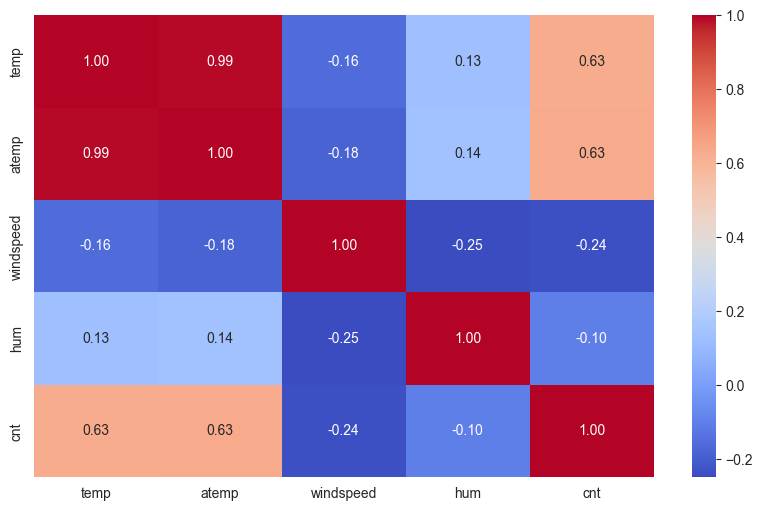

In [15]:
# Heatmap betweeen the feature and target variable
# Correlation Heatmap amongst the numerical data

plt.figure(figsize=(10,6))
sns.heatmap(df_new[cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()


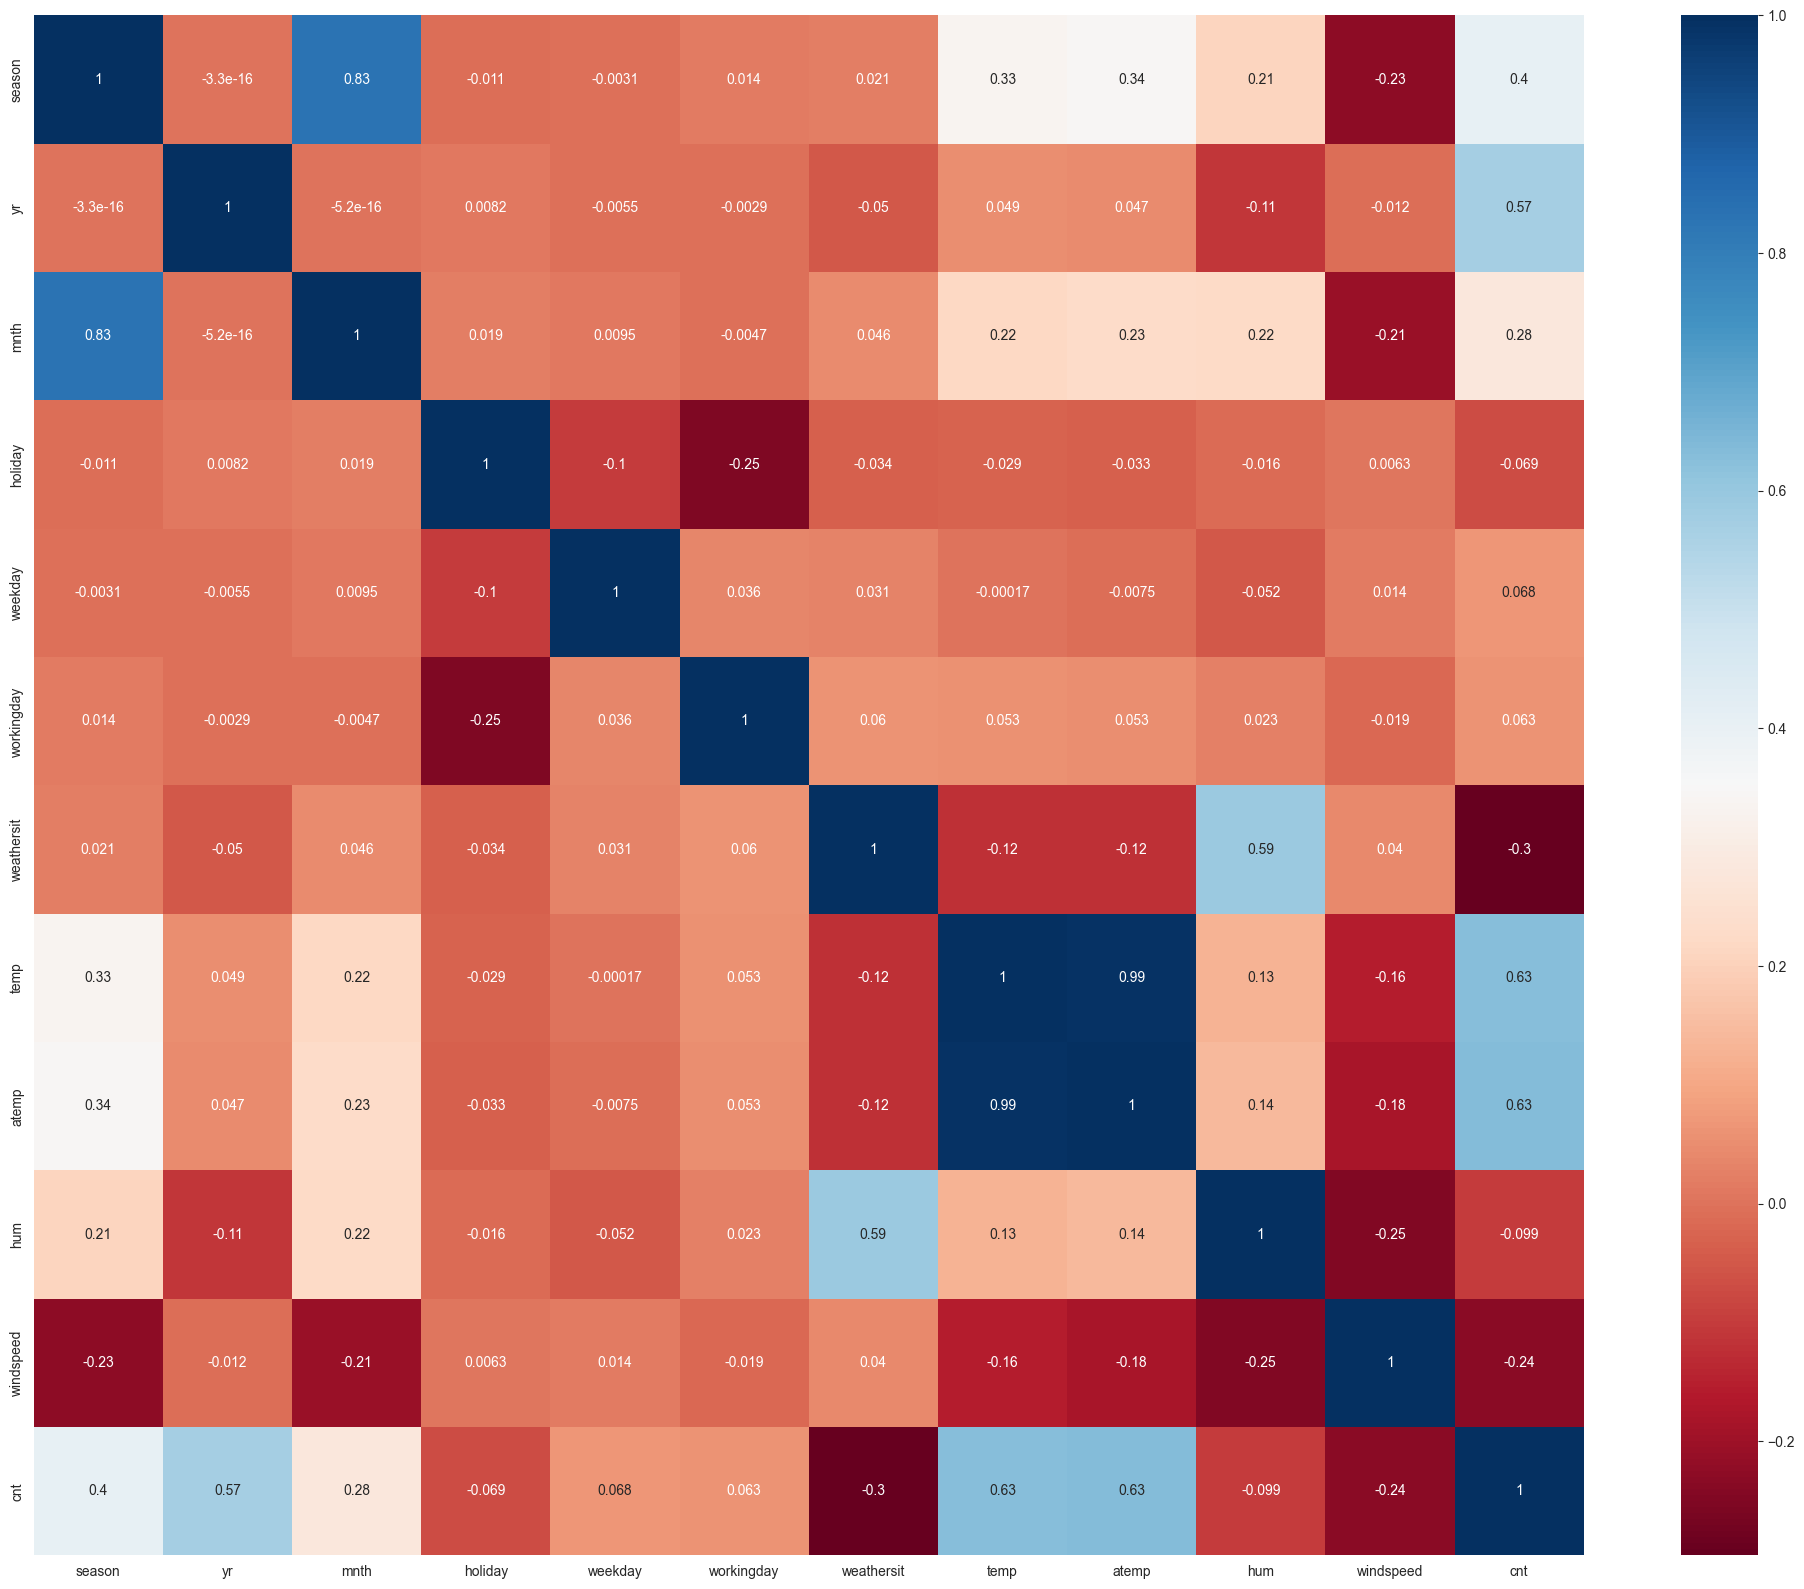

In [16]:
# Heatmap between all the cols
plt.figure(figsize = (25,20))
sns.heatmap(df_new.corr(), annot = True, cmap="RdBu")
plt.show()

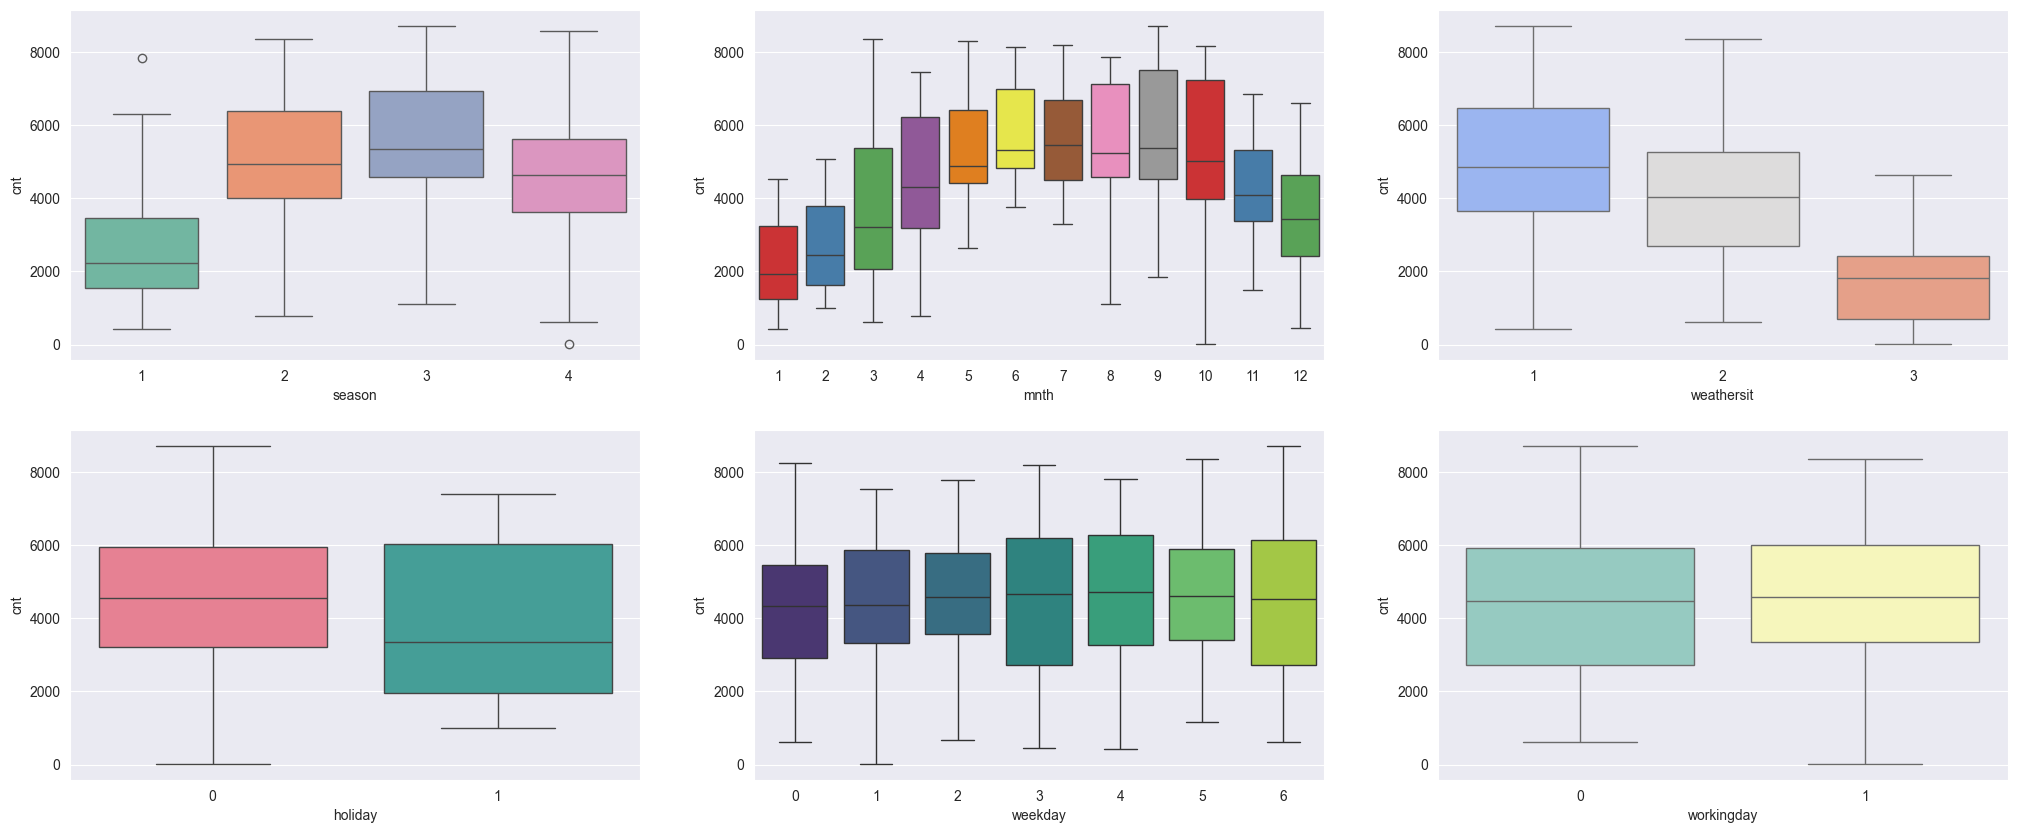

In [17]:
# subplot(no.of rows, no.of cols, location_index)
# the rows and cols are actually the size of each plot - the sqaure border size

plt.figure(figsize=(25, 10))


plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df_new, palette='Set2')

plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = df_new, palette = 'Set1')

plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df_new, palette = 'coolwarm')

plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = df_new, palette = 'husl')

plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = df_new, palette = 'viridis')

plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df_new, palette = 'Set3')


plt.show()

# Boxplot amongst all the categorical values
# The line shows the median, so, in cnt vs. season
# Median is highest in S3, so majority bikes are rented in season 3 and lowest in Season 1

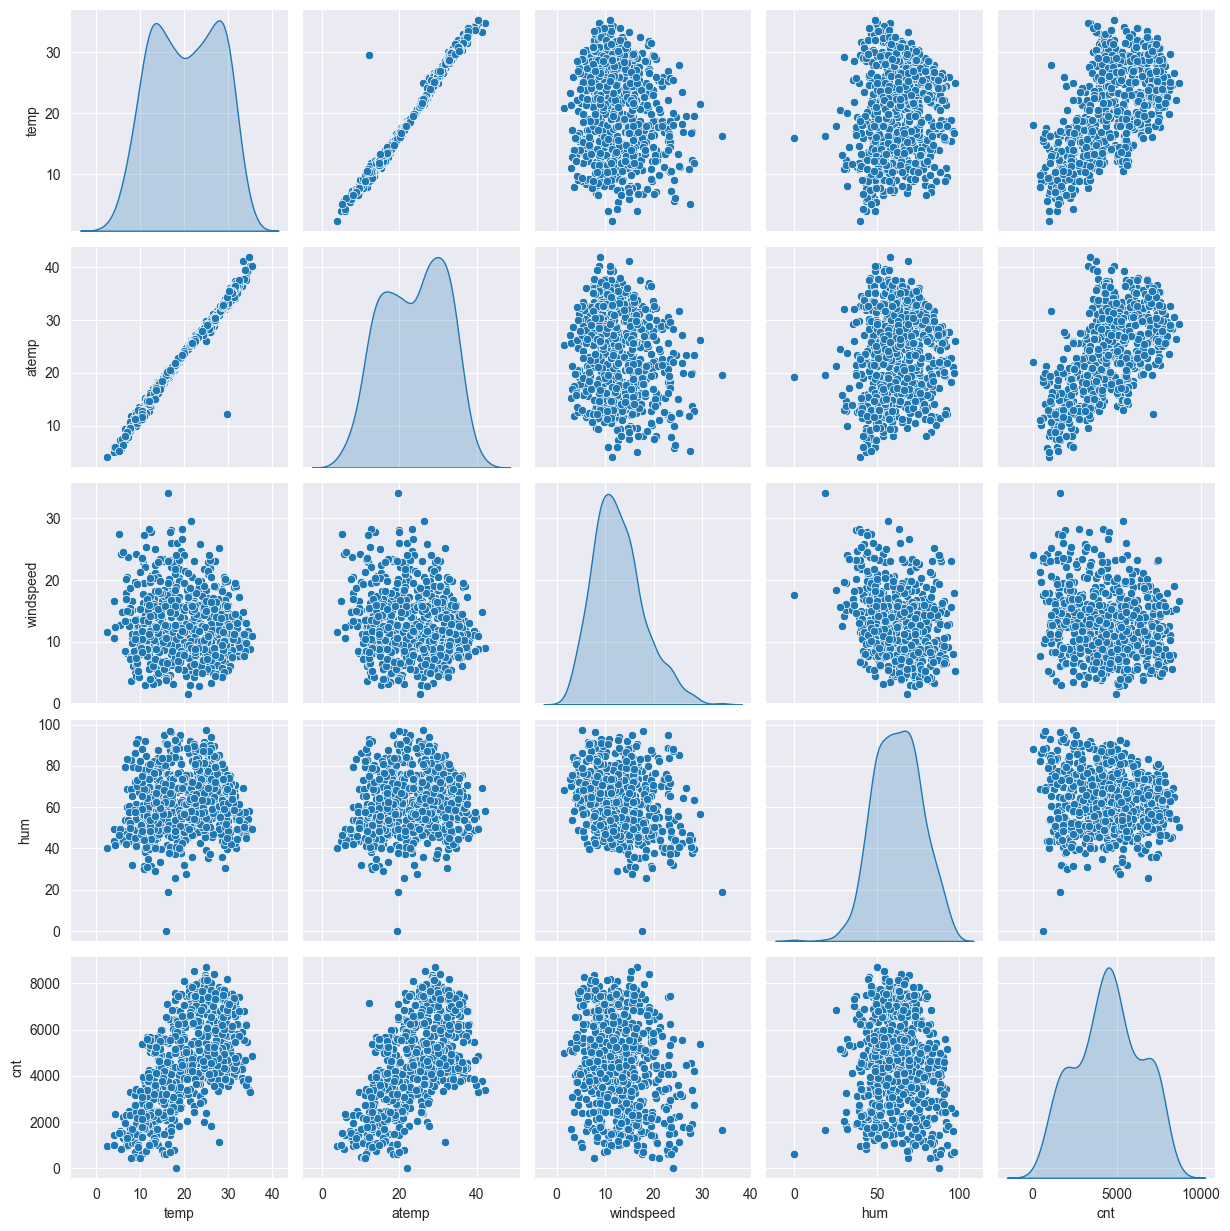

In [18]:
# Pairplot amongst all the numerical values
# To read this graph - Same as we read a heatmap

# Eg : temp vs cnt - positive correlation, hence it affects cnt more than others
df_numeric=df_new[cols]

sns.pairplot(df_numeric, diag_kind='kde')
plt.show()

Now we train and test the model

In [19]:
from sklearn.model_selection import train_test_split

x = df_new.drop(columns=['cnt'])    # drop all cols except cnt as it is target var
y = df_new['cnt']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=156)


In [20]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(x_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [21]:
y_pred = mlr.predict(x_test)
y_pred

array([3137.02054122, 3163.01370035, 5501.40971953, 2969.47854792,
       6802.34255614, 4508.18073249, 1101.22317995, 5640.87620858,
       3479.67491803, 1693.51151308, 3640.68812338, 4999.29174789,
       4747.48615443, 6079.13773494, 4099.10883937, 2285.94426905,
       3745.04562861, 6933.99855815, 5372.27488211, 5758.85161529,
       3289.56329627, 5144.76706722, 7455.76217408, 1428.59816402,
       7129.650981  ,  861.71810562, 5952.98701057, 6598.56364472,
       1347.76276006, 3852.24558552, 5688.13720176, 6568.79875754,
       6692.36233073, 3334.58980164, 2357.83850034, 5243.151168  ,
       5664.49626602, 4889.64155489, 2199.61479401, 7763.25289427,
       2605.89174262, 6403.96793535, 4525.18236424, 5083.21564977,
       1878.81494866, 6618.58540004, 6211.07768408, 6468.90087808,
       5073.2270138 , 3043.55800163, 5293.24193874, 7063.36890827,
       6179.77185235, 5568.72436585, 7070.3009579 , 5390.59028898,
       5663.91759722, 4981.30164238, 4587.69047302, 6223.66400

### Calculating the Error - RMSE, Absolute Error, R2_score

In [22]:
# Mean absolute error
mean_abs_error = metrics.mean_absolute_error(y_test, y_pred)    # original values vs. predicted values
mean_sq_error = metrics.mean_squared_error(y_test, y_pred)      # Mean Sqaured Error

rmse = np.sqrt(mean_sq_error)
r2 = metrics.r2_score(y_test, y_pred)

print("Mean Absolute Error :- ", mean_abs_error)
print("Mean Squared Error :- ", mean_abs_error)
print("RMSE :- ", rmse)
print("R2 Score :- ", r2)




Mean Absolute Error :-  690.9432169994121
Mean Squared Error :-  690.9432169994121
RMSE :-  864.3226415052858
R2 Score :-  0.8058208929568739


In [23]:
print("Training Set Evaluation Metrics: {:.4f}".format(mlr.score(x_train, y_train)))
print("Test Set Evaluation Metrics: {:.4f}".format(mlr.score(x_test, y_test)))

# We get an almost perfect fit for the model

Training Set Evaluation Metrics: 0.7987
Test Set Evaluation Metrics: 0.8058


**After Training Visualisation**

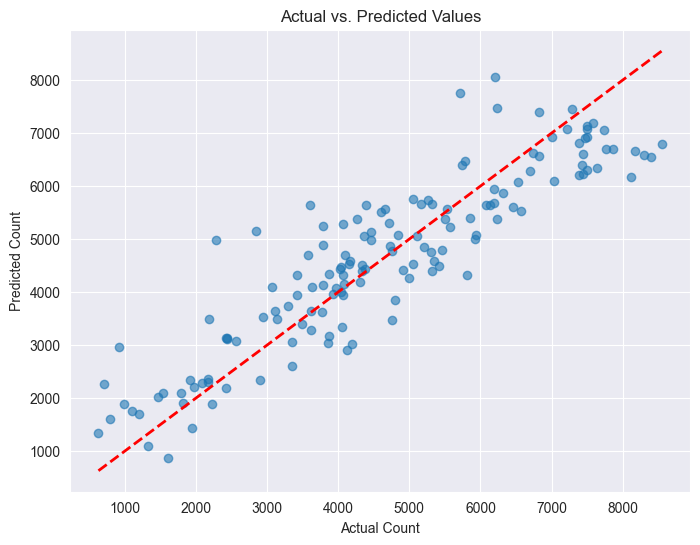

In [26]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Count')
plt.ylabel('Predicted Count')
plt.grid(True)
plt.show()
